# Merton Problem In Discrete Time

Merton Problem in Discrete time is a multi-period Portfolio optimisation problem. We will apply utility functions and our stock price model(GBM) to consider an optimal investment problem where you must decide dynamically how much money to put into a risky stock and how much to put in bonds. This will be a discrete time version of the *Merton model*.

Suppose that a stock follows discrete time geometric Brownian motion with drift $\mu$ and
volatility $\sigma$ on a grid $t \in {\cal T}=\{0, \delta t, 2 \delta t, \ldots\}$. You can also invest in a risk-free bank account with interest rate $r$. An investor, I, has initial wealth is $W_0$. The initial stock price is $S_0$. The investor's preferences over consumption at times $t \in {\cal T}=\{0, \delta t, 2 \delta t, \ldots\}$
are given by the `expected utility`.

**Expected Discounted Utility (Investors Happiness Model):**
$$ E\left( \sum_{t \in \cal T} e^{-bt} u(\gamma^I_t) \right) $$

where $\gamma^I_t$ is the amount of money they receive at time $t$, where $b>0$ is a discount factor and $u(x)=x^{1-\eta}$ is a power utility function ($\eta \in (0,1)$).
Here we have simplified the power utility function to remove the constants which clutter up the definition. This is why we have to restrict ourselves to risk aversion in $(0,1)$. This isn't necessary from a theoretical point of view, I just want to keep the formulae simpler so they are easier to follow.
We wish to compute the optimal proportion of wealth $p^\gamma_t$ to consume, the proportion $p^S_t$
to put into stocks and the optimal proportion to put into the risk-free bank account, $1-p^S_t-p^\gamma_t$
at each time $t$. [Note: Consume money means to spend and buy whatever you want.]
### Constraints

In our model, your bank account must never drop below zero and
you cannot short sell stocks. We have the *constraints*
$$
\begin{split}
p^\gamma_t &\in [0,1] \longrightarrow \text{Optimal proportion of wealth to consume.} \\
p^S_t &\in [0,1] \longrightarrow \text{Optimal proportion to put into stocks.}\\
1-p^S_t - p^\gamma_t &\in [0,1] \longrightarrow \text{Optimal proportion to put into risk-free Bank Account.}\\
\end{split}
$$
So $(p^\gamma_t,p^S_t)$ is in the region below:

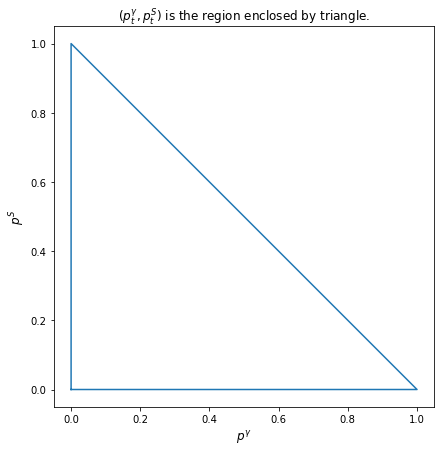

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

ax = plt.gca()
ax.plot([0,0,1,0],[0,1,0,0]);
ax.set_aspect(1)
plt.title("$(p^\gamma_t,p^S_t)$ is the region enclosed by triangle.",fontsize=12)
ax.set_xlabel("$p^\gamma$", fontsize=12)
ax.set_ylabel("$p^S$", fontsize=12);

## Infinite horizon problem
This problem is an *infinite horizon* problem as we can keep investing for all time up to $\infty$. However the discounting means that consumption far in the future should have a negligible impact. Infinite horizon problems are usually easier to solve because they have a `time-symmetry`.
### Scaling Symmetry
The key to solving this problem is symmetry. We have a `scaling symmetry`.
Consider another investor, J, who has initial wealth $\alpha W_0$ but is otherwise identical to investor I.
Suppose they follow the same strategy, investing in the same proportions.
**Lemma:** Investor $I$ and investor $J$ have the same preferences over the proportions $p^{\gamma}_t$
and $p^S_t$ (Investing in same proportions).
*Proof:*
If they follow the same strategy $p:=(p^\gamma_t,p^S_t)$,
the consumption of investor $J$ at each time, $\gamma^J_t$
will be $\alpha$ times the consumption of investor $I$.

$$ \gamma^J_t = \alpha \gamma^I_t $$
Write
$U_I^p$ for the expected utility of investor $I$ if they follow strategy $p$ and $U^p_J$ for the expected utility of investor $J$ if they follow strategy $p$.
$$
\begin{split}
U_J &= E\left( \sum_{t \in \cal T} e^{-bt} u(\gamma^J_t) \right) \\
&= E\left( \sum_{t \in \cal T} e^{-bt} ( \alpha \gamma^I_t)^{1-\eta} \right) \\
&= E\left( \sum_{t \in \cal T} e^{-bt} \alpha^{1-\eta} ( \gamma^I_t)^{1-\eta} \right) \\
&= \alpha^{1-\eta} E\left( \sum_{t \in \cal T} e^{-bt}  u( \gamma^I_t) \right) \\
&= \alpha^{1-\eta} U_I
\end{split}
$$
Let $p$ and $q$ be two strategies. We see

$$ U_I^p \lt U_I^q \iff \alpha^{1-\eta} U_I^p < \alpha^{1-\eta} U_I^q \iff U_J^p < U_J^q $$
So, the investor *J* also thinks strategy *p* is bad investment strategy compared to strategy *q*.

$\square$
### Time Symmetry
Consider an investor $K$ with identical preferences(choose same proportions as investor I)
who is only deciding on investment and consumption from time $s \in {\cal T}$ onwards.
They have wealth $W$ at time $t$. Their consumption from time $0$ to $s-\delta t$ is
already determined.

Suppose that they consume a proportion $p^\gamma_t$ at time $s+t$ and invest $p^S_t$ in stocks at time $s+t$.
**Lemma:** The preferences of investor $K$ over the strategies given by $p^\gamma_t$ and $p^S_t$
are the same as those of investor $I$.
*Proof:* Let us write $c_t$ for investor $K$'s consumption at the prior times
for $t \in \{0, \delta t, 2\delta t, \ldots s-\delta t \}$.

The expected utility of investor $K$, $U^K$, is
$$
U^K = E\left( \sum_{i=0}^{\frac{s}{\delta t}-1} e^{-bi\delta t}u(c_{i\delta t}) + \sum_{i=0}^\infty e^{-bs}e^{-b i \delta t}u(\gamma_t) \right)
$$
Define 
$$C = \sum_{i=0}^{\frac{s}{\delta t}-1} e^{-bi\delta t} u(c_t) $$
so we can write
$$
U^K= C + E \left(  e^{-bs} \sum_{i=0}^\infty u(\gamma_t) \right)
= C + e^{-bs} U^I
$$
Since investor $K$'s expected utility just differs by a constant and a scale factor from investor $I$, investor $K$ and investor
$I$ have the same preferences over the proportions $p^\gamma_t$ and $p^S_t$ that determine their
investments. $\square$

Symmetry over time due to $\infty -$ horizon and scaling symmetri which comes from the choice of preferences choosing CRRA.

### Fixed proportions

**Theorem:**
For the discrete time Merton problem with an infinite horizon and power utility,
the proportions for the optimal strategy don't depend upon either initial wealth
or time.

So they must be constants that depend only on $\mu$, $\sigma$, $r$, $\delta t$ and $S_0$.

The optimal investment proportions does not depend upon the value of $S_0$. If we have two investors $I$ and $J$ with the same utility function but initial wealth $S_0^I$ and $S_0^J$, then if they invest and consume in the same proportions then we can compute that at each time the expected utility of $I$ is equal to

$$ \left(\frac{S_0^I}{S_0^J}\right)^\alpha $$

times the expected utility of $J$. Hence the optimal proportions must be the same for both investors.

The use of power utility gives us the scaling symmetry. The use of an infinite horizon problem
gives us a time symmetry. Together they've reduced an apparently huge problem to a search
for the minimum value over the two proportions $p^\gamma$ and $p^S$.

This is a *dynamic* trading strategy as you will have to constantly rebalance your portfolio to ensure you hold a fixed proportion of your wealth in stocks. The *proportion* of stocks is constant, not the *quantity*.

Suppose that individual $I$'s wealth before consumption at time t is $W_t$. Suppose they consume
a proportion $p^\gamma$ at each time and invest a proportion $p^S$ in stocks.

* How much do they consume at time $t$? This gives an equation for $\gamma_t$.
$$ \gamma_t=p^\gamma W_t $$
* How much money do they put into Stocks at time $t$?
$$ p^S W_t $$
* How much money do they put in their bank account at time $t$?
$$(1-p^\gamma - p^S) W_t$$
* What is the value of the stock they hold before consumption and reinvestment at time $t+\delta t$?
$$ p^S \frac{S_{t+\delta t}}{S_t} W_t $$ where $(\frac{S_{t+\delta t}}{S_t}) = 1 + r$    is the discount rate/stock growth.
* What is the value of their bank account before consumption and reinvestment at time $t + \delta t$?
$$(1-p^\gamma - p^S) e^{r \delta t} W_t$$ where $e^{r \delta t}$ is the Bank growth rate.
* What is their total wealth before consumption at time $t + \delta t$? Write down a difference equation expressing $W_{t+\delta t}$ in terms of $W_t$.
$$
\boxed{
W_{t+\delta t} = p^S \frac{S_{t+\delta t}}{S_t} W_t + (1-p^\gamma - p^S) e^{r \delta t} W_t}
$$

### Simulating consumption and investment

We will write a function to simulate consumption and investment that takes the following parameters

* Let `W0` be the initial wealth
* Let `r` be the risk-free rate
* Let `S` be a matrix of stock price paths with rows representing scenarios and columns representing time points
* Let `times` be a vector of the time values corresponding to the times points used in `S`
* Let `p_gamma` be the proportion consumed
* Let `p_S` be the proportion invested in stocks
It will return a matrix of the consumption at each time with rows representing scenarios and columns representing time points. Note that we may generate appropriate `S` and `times` using our simulate_gbm_paths function. We are using consistent conventions for scenarios and times in all our code.
### Simulating consumption and investment

We can use the difference equation

$$W_{t+\delta t} = p^S \frac{S_{t+\delta t}}{S_t} W_t + (1-p^\gamma - p^S) e^{r \delta t} W_t$$

to compute the wealth at each time.
Using integer indices

$$W[i+1] = p^S \frac{S_[i+1]}{S[i]} W[i] + (1-p^\gamma - p^S) e^{r \delta t} W[i]$$
### Converted into code

In [21]:
def compute_consumption( W0, r, S, times, p_gamma, p_S ):
    ''' Returns consumption matrix $\gamma^i_t$ '''
    W = np.zeros(S.shape)    
    W[:,0] = W0

    consumption = np.zeros(S.shape)
    for i in range(0,len(times)-1):
        consumption[:,i] = p_gamma*W[:,i]
        stock_growth = S[:,i+1]/S[:,i]
        bank_growth = np.exp(r*(times[i+1]-times[i]))
        W[:,i+1] = p_S*W[:,i]*stock_growth + \
                        (1-p_gamma-p_S)*W[:,i]*bank_growth

    return consumption

### Computing expected utility

Let $\gamma^i_t$ denote the consumption at time $t$ in scenario $i$. Write $N$ as
an abbreviation for `n_paths`. Write $M$ as an abbreviation for `n_steps`

$$
\begin{split}
E\left(\sum_{t\in{\cal T}} e^{-bt} u(\gamma_t)\right)
&\approx
\frac{1}{N} \sum_{i=1}^N \sum_{t\in{\cal T}} e^{-bt} u(\gamma^N_t)) \\
&\approx
\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M e^{-bt} u(\gamma^N_{j \delta t})) \\
&\approx
\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M e^{-bt} u(\gamma[i,j]) \\
&=
\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M e^{-bt} \gamma[i,j]^{1-\eta} \\
\end{split}
$$

In [22]:
def compute_expected_utility(W0, eta, r, S, times, p_gamma, p_S ):
    n_paths = S.shape[0]    # Rows of Matrix S.
    gamma = compute_consumption(W0, r, S, times, p_gamma, p_S)
    utility = np.sum( gamma**(1-eta) * np.exp( -b*times ))/n_paths    # Elementwise calculation.
    return utility

### Choose parameter values
We can now try out our code. We will need to choose various parameter values.

In [19]:
r = 0.02
mu = 0.08
sigma = 0.7 # Rather high, makes for a nice plot.
S0 = 100
T = 100   # 100 year time period.
W0 = 1
eta = 0.5
b = 0.10  # High discount rate so over 100 years time period distant consumption have no big effect.
n_paths = 5000

### Computing the expected utility
We can now compute the expected utility for a given set of proportions $p^\gamma$ and $p^S$.

In [24]:
import mathfinance as mf
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15,7]

S, times = mf.simulate_gbm_paths(S0,mu,sigma,T, T, n_paths)
U = compute_expected_utility(W0, eta, r, S, times, p_gamma=0.8, p_S=0.1)
print('Expected Utility : ', U )

Expected Utility :  1.511824322555297


The result isn't very illuminating because the numerical value of utility isn't important.
After all, if you add a constant to your utility function, your preferences don't change.

It is the comparison of values between different strategies that is important. So let's
plot a graph of utility for different proportions.
### Plotting a 3D graph

Because of our constraints we choose a grid size $G$ and use the following parameterization:

$$u \in {0,1,2,3, \dots G-1}$$
$$v \in {0,1,2,3, \dots G-1}$$

of our plot region

$$p^\gamma(u,v) = \frac{u}{G-1} $$
$$p^s(u,v) = \frac{v}{G-1} (1 - p^\gamma(u,v)) $$

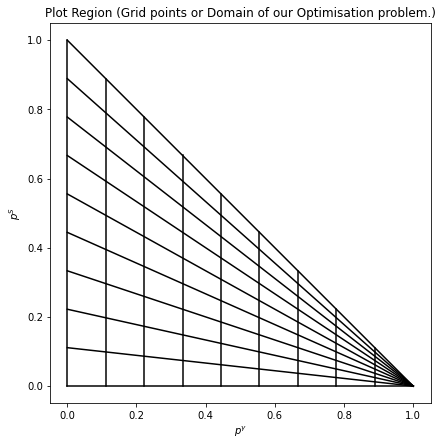

In [26]:
grid_size = 10 # Increase for smoother plots

p_gamma = np.zeros([grid_size,grid_size])
p_S = np.zeros([grid_size,grid_size])
expected_utility = np.zeros([grid_size,grid_size])
for u in range(0,grid_size):
    for v in range(0,grid_size):
        p_gamma[u,v] = u/(grid_size-1)
        p_S[u,v] = (1-p_gamma[u,v]) * v/(grid_size-1)

ax = plt.gca()
ax.plot(p_gamma,p_S, color='k');
ax.plot(p_gamma.transpose(),p_S.transpose(), color='k');
ax.set_aspect(1)
plt.title("Plot Region (Grid points or Domain of our Optimisation problem.)",fontsize=12)
ax.set_xlabel('$p^\gamma$')
ax.set_ylabel('$p^S$'); 

### 3D plot of expected utility

In [29]:
p_gamma = np.zeros([grid_size,grid_size])  # Matrix of X coordinates.
p_S = np.zeros([grid_size,grid_size])      # Matrix of Y coordinates.
expected_utility = np.zeros([grid_size,grid_size])  # Matrix of Z values.
for u in range(0,grid_size):
    for v in range(0,grid_size):
        p_gamma[u,v] = u/(grid_size-1)
        p_S[u,v] = (1-p_gamma[u,v]) * v/(grid_size-1)
        expected_utility[u,v] = compute_expected_utility(W0,eta,r,S,times,p_gamma[u,v],p_S[u,v])

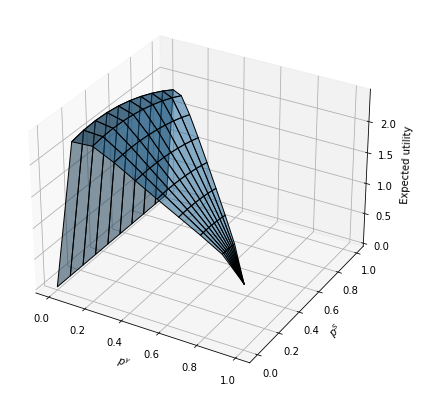

In [30]:
ax = plt.gca(projection='3d')
ax.plot_surface(p_gamma,p_S, expected_utility,edgecolors='k', alpha = 0.5);
ax.set_zlabel('Expected utility')
ax.set_xlabel('$p^\gamma$')
ax.set_ylabel('$p^S$');

### Computing the optimum proportions

We can use the package `scipy.optimize` to find the optimal proportions. The
problem we wish to solve can be written mathematically as

$$
\boxed{
\begin{aligned}
\underset{p^\gamma,p^S}{\text{minimize}} & & -E\left((\sum_{t\in \cal T} u(\gamma_t)\right) \longrightarrow \text{Objective function} \\ 
\text{subject to } & & p^\gamma \in [0,1] \\
 & & p^S \in [0,1] \\
 & & 1-p^\gamma-p^S \geq 0
\end{aligned}}
$$

This is the mathematical defination of `Merton Problem in Discrete Time`. Maximizing `Expected Utility` is same as minimizing negative Expected Utility.

### Defining the objective function

We can call its `minimize` function but we will need to tell it our objective function to minimize. So we write a function `objective` which takes as a parameter a vector $p$ containing the two proportions $p^\gamma$ and $p^S$.
Scipy minimize assumes that the value returned by a Constraint function is greater than or equal to zero i.e. $constraintfunction \geq 0 $. If its not in this form, we must transform it in this form.

In [31]:
def objective(p):
    p_gamma = p[0]
    p_S = p[1]
    return -compute_expected_utility(W0,eta,r,S,times,p_gamma,p_S)

### Defining bounds

Two of our constraints can written as bounds on $p[0]$ and $p[1]$.

In [32]:
bounds = [[0, 1], [0, 1]]  # Defining Bounds.

### Adding an Inequality Constraint

We also have the more complicated constraint $1-p[0]-p[1]\geq 0$ which says
the bank balance never drops below zero.

We represent this by defining a constraint function which must be positive
and then storing the information about our constraint in a dictionary. It
is an inequality constraint of the form

$$\text{constraintfunction}\geq 0$$

and this is the information stored in the dictionary. You can also create
equality constraints.

In [33]:
def constraint_function( p ):  # Defining Inequality Constraint.
    return 1-p[0]-p[1]

constraintDic = {"type": "ineq", "fun": constraint_function}

### Calling minimize

We pass all the information about our optimization problem to the minimize function.
The `method` tells scipy what optimization algorithm to use. The format of constraints changes
if you use different methods.

I've found 'SLSQP' usually works well.

In [35]:
import scipy.optimize

res = scipy.optimize.minimize(fun=objective,
                              x0=[0.2,0.7],  # Initial guess value for p-gamma and p-s.
                              constraints=[constraintDic],
                              bounds=bounds,
                              method='SLSQP')
print(res)

     fun: -2.5034640104779537
     jac: array([2.81208754e-03, 5.71608543e-05])
 message: 'Optimization terminated successfully'
    nfev: 26
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.15971255, 0.18481349])


The array x contains the optimal proportions i.e. $p^\gamma$ and $p^S$.

### Comparison with the plot

We finish our investigation by plotting the optimal value.

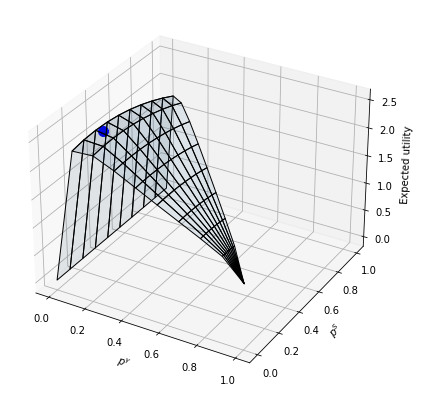

In [36]:
ax = plt.gca(projection='3d')
ax.set_zlabel('Expected utility')
ax.set_xlabel('$p^\gamma$')
ax.set_ylabel('$p^S$');
[opt_p_gamma,opt_p_S] = res['x']
optimum = -res['fun']
ax.plot_surface(p_gamma,p_S, expected_utility, alpha=0.1, edgecolors='k');
ax.scatter( opt_p_gamma,opt_p_S,optimum, s=100, c='b' );

## Summary

By using the simplest model we can think of for stocks investments and the most symmetric investment problem we have been able to compute the optimal investment strategy.
Merton solved similar problems to this in *continuous time* which is actually "easier" to work with than discrete time. You can get analytical formulae for the Merton problem in continuous time, and you don't
have to insist on solving the infinite horizon problem. You can also solve the problem with
multiple stocks. However, to do this you need to develop *stochastic calculus*.